<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [5]:
import numpy as np
from numpy import log,arctan,pi
import matplotlib.pyplot as plt


def surfaceScale(zeta,zz0):
    """
       zeta= z/L
       zz0 = z/roughness length
       
       stull equations 7.4.11
       zeta can be either a number (scalar)
       or a vector
    """
    #
    # the function monin always returns a numpy array
    # if we pass zeta as a scalar, unpack that array
    # and return the drag coefficients as scalars
    #
    is_scalar=False
    if np.isscalar(zeta):
        is_scalar = True   
    (psim,psih)=monin(zeta)
    k=0.4
    CD=k**2/(log(zz0) - psim)**2.
    CH=(k**2.)/(log(zz0) - psim)/(log(zz0) - psih)
    CDN=(k**2.)/(log(zz0)**2.)
    CHN=CDN
    if is_scalar:
        CD=CD[0]
        CH=CH[0]
    return (CD,CH,CDN,CHN)

def monin(zeta):
    #Bussinger-dyer relationships (Stull p. 383, eq. 9.7.5)
    #or Fleagle and Bussinger page 180.
    zeta=np.atleast_1d(zeta)
    psim=np.empty_like(zeta)
    psih=np.empty_like(zeta)
    for i,the_zeta in enumerate(zeta):
        if the_zeta < 0:
           x=(1 - 16*the_zeta)**(0.25)
           psim[i]=log(((1+x**2.)/2.)*((1+x)/2.)**2.) - 2.*arctan(x) + pi/2.
           psih[i]=2.*log((1.+x**2.)/2.)
        elif (the_zeta > 0):
           psim[i]= -5.*the_zeta
           psih[i]= -5.*the_zeta
        else:
          psim[i]=0.
          psih[i]=0.
    return (psim,psih)

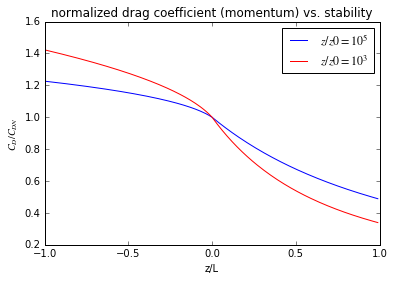

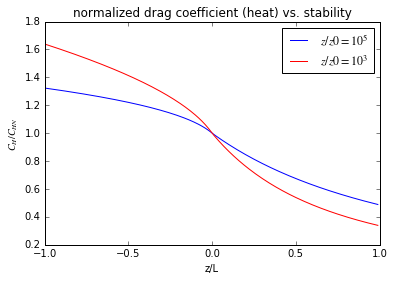

In [6]:
%matplotlib inline
zeta=np.arange(-1.0,1.0,0.01)
zz0=1.e5
(CDa,CHa,CDNa,CHNa)=surfaceScale(zeta,zz0)
zz0=1.e3
(CDb,CHb,CDNb,CHNb)=surfaceScale(zeta,zz0)
fig=plt.figure(1)
fig.clf()
ax1=fig.add_subplot(111)
ax1.plot(zeta,CDa/CDNa,'b-',label=r'$z/z0=10^5$')
ax1.plot(zeta,CDb/CDNb,'r-',label=r'$z/z0=10^3$')
ax1.set_xlabel('z/L');
ax1.set_ylabel(r'$C_D/C_{DN}$');
ax1.set_title('normalized drag coefficient (momentum) vs. stability');
ax1.legend()

fig=plt.figure(2)
fig.clf()
ax1=fig.add_subplot(111)
ax1.plot(zeta,CHa/CHNa,'b-',label=r'$z/z0=10^5$')
ax1.plot(zeta,CHb/CHNb,'r-',label=r'$z/z0=10^3$')
ax1.set_xlabel('z/L');
ax1.set_ylabel(r'$C_H/C_{HN}$');
ax1.set_title('normalized drag coefficient (heat) vs. stability');
ax1.legend()